In [336]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [337]:
df = pd.read_csv('../data/data.csv')

In [338]:
z = pd.read_csv('../data/z score.csv')

In [339]:
z.corr()

,FURN GAS PRESS,TOTAL COAL FLOW WITHOUT CALORI,W/U OIL SUPL FLOW,AH A OUT GAS TEMP,AH B OUT GAS TEMP,ECON A OUT GAS O2 ANAL.(Analysis),MAIN STEAM PRESS,MAIN STM TEMP,RH(Reheater) OUT STM PRESS(To IP Turbine),SRH(Reheater) OUT STM TEMP,...,Vaporizer C Press,Vaporizer C Level,Vaporizer C STM TCV POS,Accumulator C Inlet PCV POS,Accumulator C Press Sel,Accumulator C Temp,AMM/AIR Mixer-A Inlet Flow Sel,AMM/AIR Mixer-B Inlet Flow Sel,Dilution Air Blower A Outlet Flow,Dilution Air Blower B Outlet Flow
FURN GAS PRESS,1.000000,-0.759873,-0.220662,-0.781455,-0.796051,0.750625,-0.792603,-0.676283,-0.784260,-0.704808,...,0.396919,0.151849,-0.247617,-0.334146,0.000402,-0.129840,-0.710473,-0.696811,-0.904239,-0.903895
TOTAL COAL FLOW WITHOUT CALORI,-0.759873,1.000000,-0.170682,0.946447,0.956418,-0.966726,0.992862,0.846522,0.995928,0.868878,...,-0.549251,-0.242557,0.302699,0.448586,-0.004167,0.119318,0.947122,0.942474,0.898583,0.898554
W/U OIL SUPL FLOW,-0.220662,-0.170682,1.000000,-0.036338,-0.004982,0.173369,-0.093438,0.011762,-0.117470,0.001040,...,0.003071,0.109841,-0.045303,-0.053177,0.000939,-0.026373,-0.157343,-0.160700,0.082591,0.083086
AH A OUT GAS TEMP,-0.781455,0.946447,-0.036338,1.000000,0.989183,-0.927853,0.963889,0.922080,0.952983,0.937983,...,-0.592525,-0.223965,0.256311,0.404944,-0.000246,0.064770,0.887386,0.871583,0.933996,0.934265
AH B OUT GAS TEMP,-0.796051,0.956418,-0.004982,0.989183,1.000000,-0.931147,0.975391,0.916227,0.965074,0.931032,...,-0.584591,-0.219133,0.273757,0.420094,0.000492,0.082242,0.898290,0.887609,0.941010,0.941166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Accumulator C Temp,-0.129840,0.119318,-0.026373,0.064770,0.082242,-0.110205,0.121142,0.063808,0.125192,0.069432,...,-0.316322,-0.037479,0.728474,0.787001,0.002425,1.000000,0.213554,0.228224,0.123382,0.123944
AMM/AIR Mixer-A Inlet Flow Sel,-0.710473,0.947122,-0.157343,0.887386,0.898290,-0.904373,0.939640,0.792591,0.942505,0.813560,...,-0.546978,-0.230160,0.399337,0.549968,0.001787,0.213554,1.000000,0.984116,0.840283,0.840312
AMM/AIR Mixer-B Inlet Flow Sel,-0.696811,0.942474,-0.160700,0.871583,0.887609,-0.894902,0.934986,0.779443,0.938978,0.800288,...,-0.531207,-0.226274,0.410432,0.558420,-0.002878,0.228224,0.984116,1.000000,0.826049,0.825677
Dilution Air Blower A Outlet Flow,-0.904239,0.898583,0.082591,0.933996,0.941010,-0.880769,0.921911,0.881834,0.910835,0.902024,...,-0.554130,-0.220116,0.294989,0.429215,0.000245,0.123382,0.840283,0.826049,1.000000,0.999960


In [340]:
cor = z.corr()
c = cor['STACK NOX'].reset_index()
c.columns=['a','b']
c.sort_values(by='b', ascending=False, inplace=True)

In [341]:
c.to_excel('../result/temp.xlsx')

In [342]:
c.loc[(c['b']>=0.5)|(c['b']<=-.5), :]
index = [45, 57, 24, 61, 0, 56, 7, 55, 9, 95, 27, 10, 97, 50, 43, 113, 15, 112, 66, 47, 111, 13, 3, 59, 1, 18, 12, 6, 8, 25, 11]



In [343]:
x= df.iloc[:,[0, 46, 58, 25, 62, 1, 57, 8, 56, 10, 96, 28, 11, 98, 51, 44, 114, 16, 113, 67, 48, 112, 14, 4, 60, 2, 19, 13, 7, 9, 26, 12]]

In [344]:
y = df.iloc[:,[0,38]]

In [345]:
y

,Datetime,STACK NOX
0,2022-01-01 00:01:00,-0.463575
1,2022-01-01 00:02:00,-0.438309
2,2022-01-01 00:03:00,-0.447640
3,2022-01-01 00:04:00,-0.441375
4,2022-01-01 00:05:00,-0.428362
...,...,...
100794,2022-03-31 23:55:00,-0.062662
100795,2022-03-31 23:56:00,-0.062710
100796,2022-03-31 23:57:00,-0.062758
100797,2022-03-31 23:58:00,-0.062806


In [346]:
x.reset_index(inplace=True, drop=True)

In [347]:
x

,Datetime,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,SRH(Reheater) OUT STM TEMP,...,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,Condenser to Deaerator Flow,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-01 00:01:00,-0.566871,-0.524352,-0.578197,-0.623388,-0.965250,-0.387134,0.577677,0.009553,0.594366,...,0.538398,0.663456,0.282520,0.306123,0.294596,0.306508,0.306628,0.308049,0.617433,0.308558
1,2022-01-01 00:02:00,-0.570313,-0.490995,-0.564759,-0.526568,-0.315242,-0.316429,0.577887,0.102385,0.587833,...,0.537934,0.664274,0.288840,0.309926,0.336156,0.297312,0.309864,0.301657,0.652061,0.302447
2,2022-01-01 00:03:00,-0.560475,-0.493804,-0.530670,-0.447160,-0.297081,-0.293409,0.576875,0.011988,0.589341,...,0.538508,0.666430,0.284990,0.311468,0.318102,0.298822,0.305656,0.302188,0.692272,0.303388
3,2022-01-01 00:04:00,-0.594884,-0.518237,-0.595425,-0.396006,-0.282139,-0.292034,0.576500,0.028549,0.597588,...,0.538556,0.667665,0.312296,0.309277,0.318661,0.296774,0.310393,0.301519,0.645534,0.302084
4,2022-01-01 00:05:00,-0.608795,-0.537116,-0.587296,-0.317537,-0.359693,-0.266477,0.579929,0.056377,0.609830,...,0.538220,0.669332,0.372074,0.306651,0.321671,0.300188,0.310949,0.306016,0.635138,0.307063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100794,2022-03-31 23:55:00,1.558450,1.565571,1.512315,1.460020,1.143590,0.408832,-2.516407,-2.085292,-2.335996,...,-1.885149,-1.787811,-1.419122,-1.461326,-1.513462,-1.441871,-1.512850,-1.466972,-1.814974,-1.459496
100795,2022-03-31 23:56:00,1.557989,1.565574,1.512315,1.460020,1.143590,0.404936,-2.516434,-1.910231,-2.336430,...,-1.885188,-1.788223,-1.419122,-1.461326,-1.513459,-1.441889,-1.512850,-1.466821,-1.815736,-1.459713
100796,2022-03-31 23:57:00,1.558287,1.565635,1.512315,1.460020,1.143590,0.401860,-2.516747,-1.776198,-2.336473,...,-1.885227,-1.788334,-1.419122,-1.461326,-1.513456,-1.441906,-1.512850,-1.466915,-1.816412,-1.459714
100797,2022-03-31 23:58:00,1.557669,1.565601,1.512315,1.460020,1.143590,0.400703,-2.516656,-1.705001,-2.335819,...,-1.885267,-1.788437,-1.419122,-1.461326,-1.513453,-1.441923,-1.512850,-1.467038,-1.816854,-1.459888


In [348]:
y.reset_index(inplace=True, drop=True)

In [349]:
y

,Datetime,STACK NOX
0,2022-01-01 00:01:00,-0.463575
1,2022-01-01 00:02:00,-0.438309
2,2022-01-01 00:03:00,-0.447640
3,2022-01-01 00:04:00,-0.441375
4,2022-01-01 00:05:00,-0.428362
...,...,...
100794,2022-03-31 23:55:00,-0.062662
100795,2022-03-31 23:56:00,-0.062710
100796,2022-03-31 23:57:00,-0.062758
100797,2022-03-31 23:58:00,-0.062806


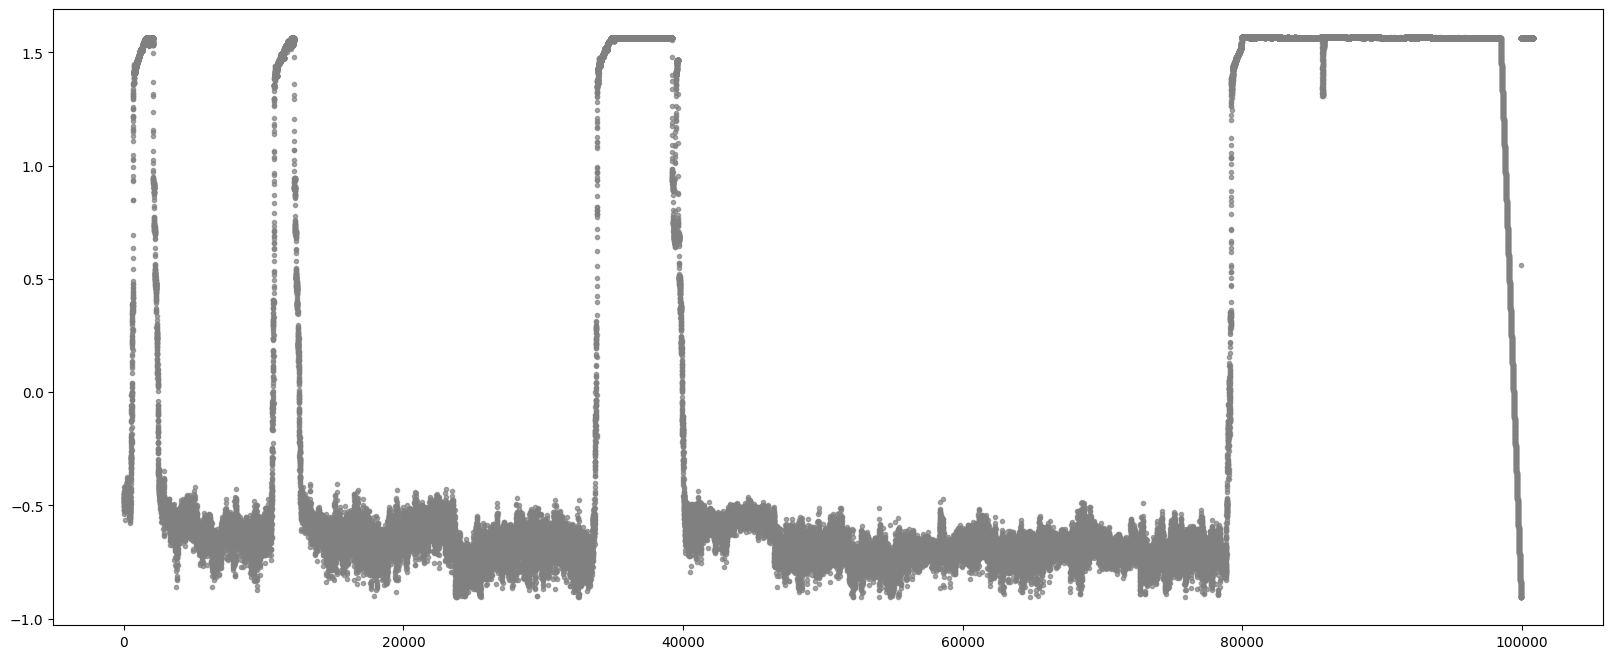

In [350]:
plt.figure(figsize=(20,8))
plt.plot(x.iloc[:, 2], marker='.', linestyle=' ', color='grey', alpha=0.7)
plt.show()
#y.plot(marker='.',linestyle=' ')

In [351]:
k= df.iloc[:,[0, 38, 46, 58, 25, 62, 1, 57, 8, 56, 10, 96, 28, 11, 98, 51, 44, 114, 16, 113, 67, 48, 112, 14, 4, 60, 2, 19, 13, 7, 9, 26, 12]]

In [352]:
k

,Datetime,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,Condenser to Deaerator Flow,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-01 00:01:00,-0.463575,-0.566871,-0.524352,-0.578197,-0.623388,-0.965250,-0.387134,0.577677,0.009553,...,0.538398,0.663456,0.282520,0.306123,0.294596,0.306508,0.306628,0.308049,0.617433,0.308558
1,2022-01-01 00:02:00,-0.438309,-0.570313,-0.490995,-0.564759,-0.526568,-0.315242,-0.316429,0.577887,0.102385,...,0.537934,0.664274,0.288840,0.309926,0.336156,0.297312,0.309864,0.301657,0.652061,0.302447
2,2022-01-01 00:03:00,-0.447640,-0.560475,-0.493804,-0.530670,-0.447160,-0.297081,-0.293409,0.576875,0.011988,...,0.538508,0.666430,0.284990,0.311468,0.318102,0.298822,0.305656,0.302188,0.692272,0.303388
3,2022-01-01 00:04:00,-0.441375,-0.594884,-0.518237,-0.595425,-0.396006,-0.282139,-0.292034,0.576500,0.028549,...,0.538556,0.667665,0.312296,0.309277,0.318661,0.296774,0.310393,0.301519,0.645534,0.302084
4,2022-01-01 00:05:00,-0.428362,-0.608795,-0.537116,-0.587296,-0.317537,-0.359693,-0.266477,0.579929,0.056377,...,0.538220,0.669332,0.372074,0.306651,0.321671,0.300188,0.310949,0.306016,0.635138,0.307063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100794,2022-03-31 23:55:00,-0.062662,1.558450,1.565571,1.512315,1.460020,1.143590,0.408832,-2.516407,-2.085292,...,-1.885149,-1.787811,-1.419122,-1.461326,-1.513462,-1.441871,-1.512850,-1.466972,-1.814974,-1.459496
100795,2022-03-31 23:56:00,-0.062710,1.557989,1.565574,1.512315,1.460020,1.143590,0.404936,-2.516434,-1.910231,...,-1.885188,-1.788223,-1.419122,-1.461326,-1.513459,-1.441889,-1.512850,-1.466821,-1.815736,-1.459713
100796,2022-03-31 23:57:00,-0.062758,1.558287,1.565635,1.512315,1.460020,1.143590,0.401860,-2.516747,-1.776198,...,-1.885227,-1.788334,-1.419122,-1.461326,-1.513456,-1.441906,-1.512850,-1.466915,-1.816412,-1.459714
100797,2022-03-31 23:58:00,-0.062806,1.557669,1.565601,1.512315,1.460020,1.143590,0.400703,-2.516656,-1.705001,...,-1.885267,-1.788437,-1.419122,-1.461326,-1.513453,-1.441923,-1.512850,-1.467038,-1.816854,-1.459888


In [353]:
p = pd.read_csv('../data/preprocessing.csv')

C:\Users\CSK\AppData\Local\Temp\ipykernel_15000\2183049339.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  p = pd.read_csv('../data/preprocessing.csv')


In [354]:
p1= p.iloc[:,[0, 38, 46, 58, 25, 62, 1, 57, 8, 56, 10, 96, 28, 11, 98, 51, 44, 114, 16, 113, 67, 48, 112, 14, 4, 60, 2, 13, 7, 9, 26, 12]]

In [355]:
p1 = p1.drop(0, axis=0)

In [356]:
p1.reset_index(inplace=True, drop=True)

In [357]:
p1

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-01 00:01:00,15.644674301147461,2.6769039630889893,3.3181777000427246,3.269325017929077,-8.78960132598877,-3.7537879943847656,-13.259869575500488,601.3355712890625,0.006265721283853054,...,94.8687744140625,154.34825134277344,118.29544067382812,101.8531265258789,291.8499755859375,4.897784233093262,190.0101776123047,30.266944885253906,91.13130187988281,31.784812927246094
1,2022-01-01 00:02:00,17.693906784057617,2.6497786045074463,3.60874080657959,3.3093748092651367,-8.379728317260742,-2.659780740737915,-12.73001480102539,601.3739624023438,0.006393006537109613,...,94.66738891601562,154.32142639160156,118.33184051513672,102.23139190673828,292.47796630859375,4.873561859130859,190.34747314453125,30.159149169921875,92.61862182617188,31.67740249633789
2,2022-01-01 00:03:00,16.937053680419922,2.727306842803955,3.584271192550659,3.410977602005005,-8.043563842773438,-2.6292154788970947,-12.557506561279297,601.1885375976562,0.006269061006605625,...,94.29264831542969,154.35458374023438,118.4277572631836,102.00098419189453,292.7325744628906,4.877539157867432,189.90882873535156,30.168106079101562,94.34579467773438,31.69394302368164
3,2022-01-01 00:04:00,17.445209503173828,2.456150770187378,3.3714418411254883,3.2179763317108154,-7.8270111083984375,-2.6040666103363037,-12.547201156616211,601.119873046875,0.0062917680479586124,...,99.48920440673828,154.3573760986328,118.4826889038086,103.6353759765625,292.3708190917969,4.872145652770996,190.40261840820312,30.15683364868164,92.33827209472656,31.671024322509766
4,2022-01-01 00:05:00,18.500633239746094,2.346522331237793,3.2069926261901855,3.2422056198120117,-7.494822025299072,-2.7345950603485107,-12.35568618774414,601.7479858398438,0.006329923402518034,...,100.710205078125,154.3379669189453,118.55685424804688,107.21343994140625,291.9371643066406,4.881138324737549,190.46047973632812,30.23265838623047,91.8917465209961,31.75853729248047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100794,2022-03-31 23:55:00,48.161232,19.425358,21.522943,9.5,0.03021,-0.204471,-7.295024,34.501793,0.003393,...,0.034583,14.381057,9.227257,0.0,0.0,0.292851,0.370789,0.334526,-13.345116,0.70839
100795,2022-03-31 23:56:00,48.157345,19.421726,21.522974,9.5,0.03021,-0.204471,-7.324222,34.496841,0.003633,...,0.034582,14.378798,9.20892,0.0,0.0,0.292805,0.370789,0.337069,-13.377852,0.704577
100796,2022-03-31 23:57:00,48.153458,19.424072,21.523499,9.5,0.03021,-0.204471,-7.347273,34.439465,0.003817,...,0.034582,14.37654,9.204,0.0,0.0,0.292759,0.370789,0.335491,-13.406884,0.70457
100797,2022-03-31 23:58:00,48.149574,19.419201,21.523205,9.5,0.03021,-0.204471,-7.355945,34.456226,0.003915,...,0.034579,14.374282,9.199413,0.0,0.0,0.292713,0.370789,0.333403,-13.425872,0.701498


In [358]:
p1.iloc[:, 1:] = p1.iloc[:, 1:].astype('float')

In [359]:
p1.dtypes

Description                                  object
STACK NOX                                    object
SCR A Inlet O2 1 Sel                         object
SCR A Outlet O2 1 Sel                        object
ECON B OUT GAS O2 ANAL                       object
SCR B Inlet Duct Press                       object
FURN GAS PRESS                               object
SCR A Outlet Duct Press                      object
MAIN STM TEMP                                object
SCR A Outlet NH3 1 Sel                       object
SRH(Reheater) OUT STM TEMP                   object
Accumulator A Inlet PCV POS                  object
AH A IN SEC AIR PRESS                        object
PRH(Preheater) IN STM TEMP                   object
Accumulator A Temp                           object
9SC-DIT34A                                   object
SCR A Inlet Duct Temp Sel                    object
Dilution Air Blower A Outlet Flow            object
ECON INLET FW TEMP                           object
AMM/AIR Mixe

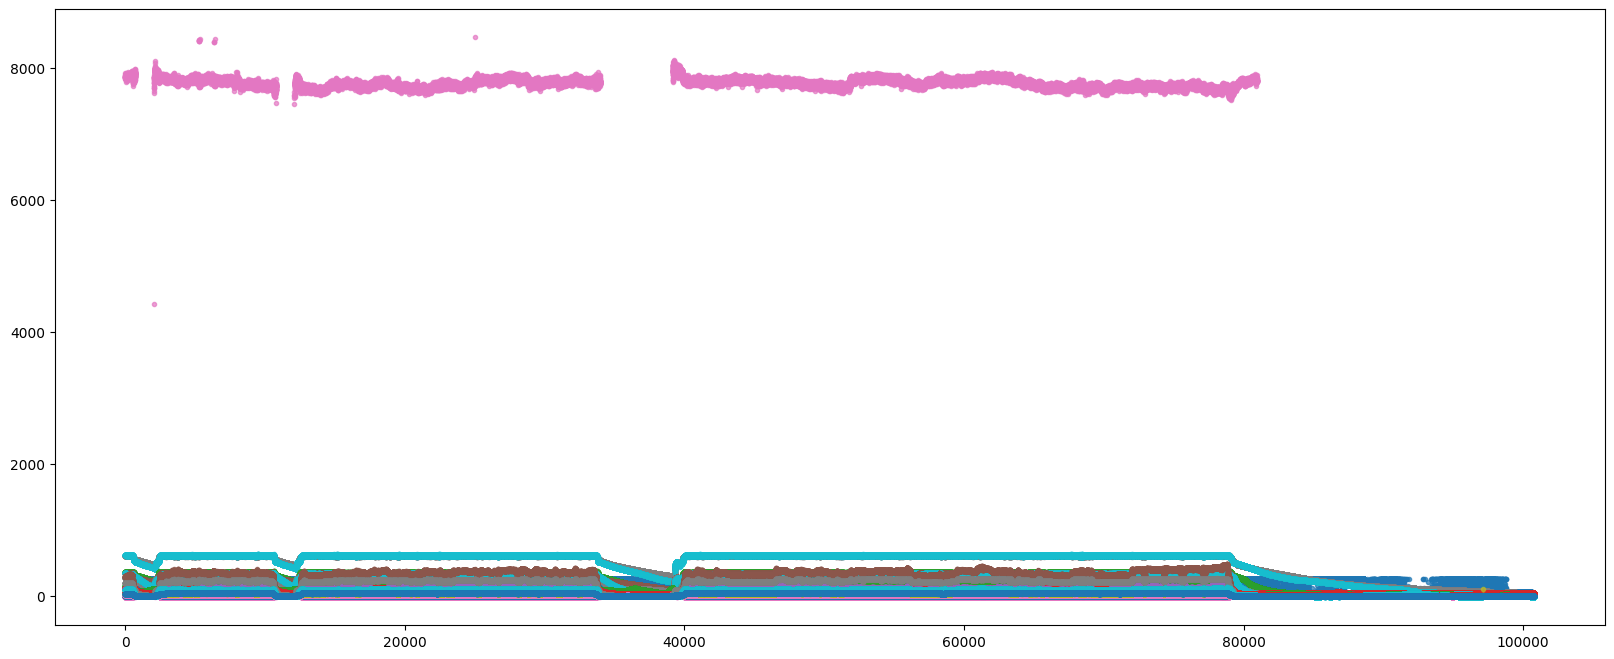

In [360]:
plt.figure(figsize=(20,8))
# plt.plot( p1.iloc[:,2], marker='.', linestyle=' ', color='grey', alpha=0.7)
plt.plot( p1.iloc[:,1:], marker='.', linestyle=' ', alpha=0.7)

plt.show()

In [361]:
# p1.to_csv("../data/p1.csv", index = False)

In [362]:
p1.drop(np.r_[0:2480, 10556:12636, 33555:40036, 78475:100799], axis=0, inplace=True)


In [363]:
p1

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
2480,2022-01-02 17:21:00,7.298507,3.526023,4.814068,4.22288,-6.610844,-1.593303,-12.610141,597.957336,0.005817,...,97.139664,147.734161,103.326927,84.524704,330.882172,4.791044,184.687943,31.154491,107.668388,32.72839
2481,2022-01-02 17:22:00,7.317454,3.697514,4.882964,4.094655,-7.236453,-1.962087,-12.673123,597.912109,0.006015,...,97.189583,148.282196,103.607155,85.406693,329.54599,4.86643,187.320694,31.378616,106.23645,32.959721
2482,2022-01-02 17:23:00,8.19602,3.762388,4.712098,4.156788,-7.654256,-1.712566,-12.762771,596.501282,0.005587,...,94.527596,148.896072,103.804382,84.458702,328.00415,4.894835,188.627502,31.403648,105.07515,32.986744
2483,2022-01-02 17:24:00,6.186108,3.800329,4.939721,4.069403,-7.086837,-1.944393,-13.081701,594.909973,0.006054,...,94.652222,149.685776,103.971046,86.044731,329.026611,4.873897,188.928131,31.104284,105.607208,32.670158
2484,2022-01-02 17:25:00,7.158616,3.826208,4.882938,4.012414,-7.596999,-2.004631,-13.265251,595.766907,0.0057,...,97.977684,150.186188,104.208488,86.30896,330.415863,4.855412,189.385696,30.918022,107.866341,32.475784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78470,2022-03-16 11:51:00,18.419493,1.362339,1.209173,3.018301,-10.306822,-1.137084,-17.058517,603.60553,0.007019,...,223.972687,165.34758,118.77858,158.10733,453.707001,7.03668,249.142868,44.087776,104.398155,46.152283
78471,2022-03-16 11:52:00,19.218729,1.440606,1.153707,3.176707,-10.99775,-2.01466,-17.837925,602.928101,0.007019,...,198.30571,165.624893,118.798622,157.554337,453.322052,7.048404,248.72467,44.148773,103.65667,46.214622
78472,2022-03-16 11:53:00,19.073271,1.794209,1.574447,3.209239,-10.617782,-1.974389,-17.437344,600.781067,0.007019,...,182.354584,166.08136,118.996597,152.970673,454.827759,7.03911,248.024734,44.074032,104.710709,46.122807
78473,2022-03-16 11:54:00,19.401367,1.917023,1.682098,3.109566,-10.394741,-1.867612,-17.595339,601.025696,0.007019,...,200.991058,166.385025,119.089935,156.06868,456.635956,7.036053,247.855057,44.03347,104.677505,46.108162


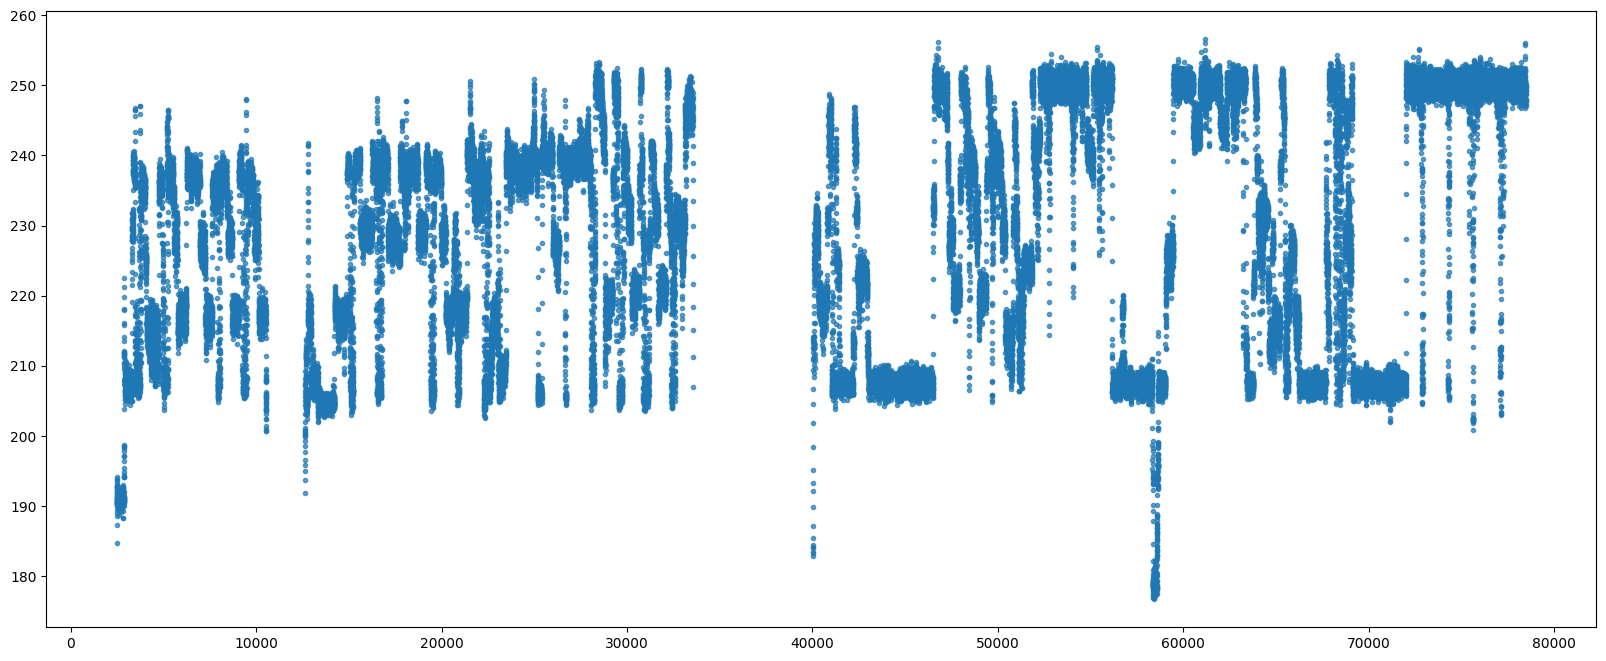

In [364]:
plt.figure(figsize=(20,8))
# plt.plot( p1.iloc[:,2], marker='.', linestyle=' ', color='grey', alpha=0.7)
plt.plot( p1.iloc[:,28], marker='.', linestyle=' ', alpha=0.7)

plt.show()

In [365]:
p1.reset_index(inplace=True, drop=True)


In [366]:
p2 = p1.iloc[:,1:]
p2

,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,SRH(Reheater) OUT STM TEMP,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,7.298507,3.526023,4.814068,4.22288,-6.610844,-1.593303,-12.610141,597.957336,0.005817,608.87085,...,97.139664,147.734161,103.326927,84.524704,330.882172,4.791044,184.687943,31.154491,107.668388,32.72839
1,7.317454,3.697514,4.882964,4.094655,-7.236453,-1.962087,-12.673123,597.912109,0.006015,607.827087,...,97.189583,148.282196,103.607155,85.406693,329.54599,4.86643,187.320694,31.378616,106.23645,32.959721
2,8.19602,3.762388,4.712098,4.156788,-7.654256,-1.712566,-12.762771,596.501282,0.005587,605.358459,...,94.527596,148.896072,103.804382,84.458702,328.00415,4.894835,188.627502,31.403648,105.07515,32.986744
3,6.186108,3.800329,4.939721,4.069403,-7.086837,-1.944393,-13.081701,594.909973,0.006054,602.403992,...,94.652222,149.685776,103.971046,86.044731,329.026611,4.873897,188.928131,31.104284,105.607208,32.670158
4,7.158616,3.826208,4.882938,4.012414,-7.596999,-2.004631,-13.265251,595.766907,0.0057,601.972778,...,97.977684,150.186188,104.208488,86.30896,330.415863,4.855412,189.385696,30.918022,107.866341,32.475784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67429,18.419493,1.362339,1.209173,3.018301,-10.306822,-1.137084,-17.058517,603.60553,0.007019,613.329895,...,223.972687,165.34758,118.77858,158.10733,453.707001,7.03668,249.142868,44.087776,104.398155,46.152283
67430,19.218729,1.440606,1.153707,3.176707,-10.99775,-2.01466,-17.837925,602.928101,0.007019,613.675781,...,198.30571,165.624893,118.798622,157.554337,453.322052,7.048404,248.72467,44.148773,103.65667,46.214622
67431,19.073271,1.794209,1.574447,3.209239,-10.617782,-1.974389,-17.437344,600.781067,0.007019,612.267517,...,182.354584,166.08136,118.996597,152.970673,454.827759,7.03911,248.024734,44.074032,104.710709,46.122807
67432,19.401367,1.917023,1.682098,3.109566,-10.394741,-1.867612,-17.595339,601.025696,0.007019,611.540466,...,200.991058,166.385025,119.089935,156.06868,456.635956,7.036053,247.855057,44.03347,104.677505,46.108162


In [367]:
import numpy as np
import pandas as pd
from scipy import stats

p2 = p2.apply(pd.to_numeric, errors='coerce')
z_scores = np.abs(stats.zscore(p2))
outliers = np.where(z_scores > 3)

In [368]:
p2 = p1.iloc[:,1:].apply(pd.to_numeric, errors='coerce')
p4 = p1.iloc[:,0]



In [369]:
p1

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-02 17:21:00,7.298507,3.526023,4.814068,4.22288,-6.610844,-1.593303,-12.610141,597.957336,0.005817,...,97.139664,147.734161,103.326927,84.524704,330.882172,4.791044,184.687943,31.154491,107.668388,32.72839
1,2022-01-02 17:22:00,7.317454,3.697514,4.882964,4.094655,-7.236453,-1.962087,-12.673123,597.912109,0.006015,...,97.189583,148.282196,103.607155,85.406693,329.54599,4.86643,187.320694,31.378616,106.23645,32.959721
2,2022-01-02 17:23:00,8.19602,3.762388,4.712098,4.156788,-7.654256,-1.712566,-12.762771,596.501282,0.005587,...,94.527596,148.896072,103.804382,84.458702,328.00415,4.894835,188.627502,31.403648,105.07515,32.986744
3,2022-01-02 17:24:00,6.186108,3.800329,4.939721,4.069403,-7.086837,-1.944393,-13.081701,594.909973,0.006054,...,94.652222,149.685776,103.971046,86.044731,329.026611,4.873897,188.928131,31.104284,105.607208,32.670158
4,2022-01-02 17:25:00,7.158616,3.826208,4.882938,4.012414,-7.596999,-2.004631,-13.265251,595.766907,0.0057,...,97.977684,150.186188,104.208488,86.30896,330.415863,4.855412,189.385696,30.918022,107.866341,32.475784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67429,2022-03-16 11:51:00,18.419493,1.362339,1.209173,3.018301,-10.306822,-1.137084,-17.058517,603.60553,0.007019,...,223.972687,165.34758,118.77858,158.10733,453.707001,7.03668,249.142868,44.087776,104.398155,46.152283
67430,2022-03-16 11:52:00,19.218729,1.440606,1.153707,3.176707,-10.99775,-2.01466,-17.837925,602.928101,0.007019,...,198.30571,165.624893,118.798622,157.554337,453.322052,7.048404,248.72467,44.148773,103.65667,46.214622
67431,2022-03-16 11:53:00,19.073271,1.794209,1.574447,3.209239,-10.617782,-1.974389,-17.437344,600.781067,0.007019,...,182.354584,166.08136,118.996597,152.970673,454.827759,7.03911,248.024734,44.074032,104.710709,46.122807
67432,2022-03-16 11:54:00,19.401367,1.917023,1.682098,3.109566,-10.394741,-1.867612,-17.595339,601.025696,0.007019,...,200.991058,166.385025,119.089935,156.06868,456.635956,7.036053,247.855057,44.03347,104.677505,46.108162


In [370]:
p2 = stats.zscore(p2.iloc[:,:])

In [371]:
p2

,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,SRH(Reheater) OUT STM TEMP,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,-0.997139,3.680341,4.062455,4.004199,2.967477,2.804255,1.807486,-1.540271,-2.382717,-0.801833,...,-1.021634,-4.977785,-4.238205,-1.619321,-0.691447,-2.472984,-2.612308,-1.849883,2.053229,-1.847998
1,-0.994633,4.072243,4.165622,3.580615,2.145329,2.072974,1.751463,-1.558986,-1.988941,-1.094115,...,-1.019934,-4.768831,-4.155944,-1.582280,-0.734375,-2.299573,-2.455162,-1.771618,1.854672,-1.770237
2,-0.878419,4.220498,3.909760,3.785867,1.596269,2.567762,1.671722,-2.142776,-2.840175,-1.785397,...,-1.110596,-4.534773,-4.098047,-1.622093,-0.783910,-2.234233,-2.377160,-1.762877,1.693643,-1.761153
3,-1.144283,4.307203,4.250613,3.497196,2.341948,2.108061,1.388034,-2.801247,-1.911858,-2.612728,...,-1.106351,-4.233676,-4.049122,-1.555484,-0.751061,-2.282397,-2.359216,-1.867415,1.767420,-1.867572
4,-1.015643,4.366343,4.165584,3.308936,1.671514,1.988613,1.224767,-2.446654,-2.615525,-2.733479,...,-0.993093,-4.042880,-3.979420,-1.544387,-0.706429,-2.324918,-2.331904,-1.932459,2.080677,-1.932911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67429,0.473903,-1.264250,-1.335688,0.024951,-1.889621,3.708915,-2.149336,0.796909,0.006577,0.446820,...,3.298038,1.737832,0.297674,1.470959,3.254542,2.692652,1.234940,2.666457,1.599770,2.664395
67430,0.579623,-1.085387,-1.418746,0.548236,-2.797610,1.968725,-2.842617,0.516594,0.006577,0.543678,...,2.423873,1.843566,0.303558,1.447734,3.242175,2.719621,1.209978,2.687757,1.496953,2.685350
67431,0.560382,-0.277313,-0.788710,0.655703,-2.298271,2.048581,-2.486301,-0.371833,0.006577,0.149326,...,1.880611,2.017607,0.361674,1.255232,3.290548,2.698241,1.168200,2.661657,1.643109,2.654487
67432,0.603782,0.003351,-0.627508,0.326440,-2.005161,2.260314,-2.626837,-0.270607,0.006577,-0.054268,...,2.515331,2.133388,0.389073,1.385341,3.348640,2.691210,1.158072,2.647493,1.638505,2.649564


In [372]:
p5 = pd.concat([p4,p2],axis=1)

In [373]:
z1 = p5.drop(outliers[0]).reset_index(drop=True)

In [374]:
z1

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-02 18:23:00,-0.696720,1.780565,2.991449,2.256335,1.092835,0.794482,1.119847,-0.239467,-2.623049,...,-1.703267,-2.411596,-0.803235,-1.951646,-1.054610,-2.245224,-2.225343,-2.028138,1.154996,-2.026161
1,2022-01-02 18:26:00,-1.136638,2.060365,2.844743,2.193955,1.241182,0.187569,0.825091,-0.573274,-2.934943,...,-1.588441,-2.403986,-0.732489,-1.983516,-1.094731,-2.148095,-2.214059,-1.994608,1.173750,-1.994063
2,2022-01-02 18:28:00,-1.072279,2.094039,2.970381,1.718137,1.800609,0.376263,1.109972,-0.748070,-2.978062,...,-1.550945,-2.384171,-0.705726,-1.963824,-1.076626,-2.192102,-2.247237,-2.047210,1.242733,-2.044568
3,2022-01-02 18:29:00,-0.964906,1.876524,2.476940,1.246795,0.571312,0.333397,0.804488,-0.280129,-2.135760,...,-1.699520,-2.391775,-0.671157,-1.991270,-1.069302,-2.206725,-2.251125,-2.059985,1.402284,-2.055574
4,2022-01-02 18:30:00,-1.090287,1.899278,2.646269,1.435392,0.505971,-0.433901,0.597248,0.537152,-1.585906,...,-1.678613,-2.383275,-0.655258,-1.883006,-1.073603,-2.220357,-2.234001,-2.057402,1.130145,-2.053294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62775,2022-03-16 11:41:00,0.265857,0.000963,-0.178544,2.395042,-1.810446,0.420922,-1.151115,-1.762902,0.006577,...,1.859310,1.417205,0.204051,0.327606,1.876406,1.118065,1.125768,1.146253,0.446107,1.134180
62776,2022-03-16 11:42:00,0.161821,-0.907756,-0.520904,1.760988,-0.913002,1.519289,-1.338824,-0.996386,0.006577,...,1.929065,1.358038,0.163715,0.638279,2.061500,1.111407,1.109180,1.168355,0.571459,1.168223
62777,2022-03-16 11:43:00,0.237987,-0.725154,-0.598766,0.966108,-1.782670,1.250577,-1.370039,0.475098,0.006577,...,2.108986,1.296508,0.149471,0.913418,2.345914,1.210235,1.155295,1.304677,0.710798,1.309256
62778,2022-03-16 11:44:00,0.395763,-1.366680,-0.785705,0.135387,-1.641799,2.296248,-1.620015,1.654851,0.006577,...,2.053040,1.236892,0.152344,1.078345,2.513985,1.422461,1.216345,1.519712,0.757007,1.517956


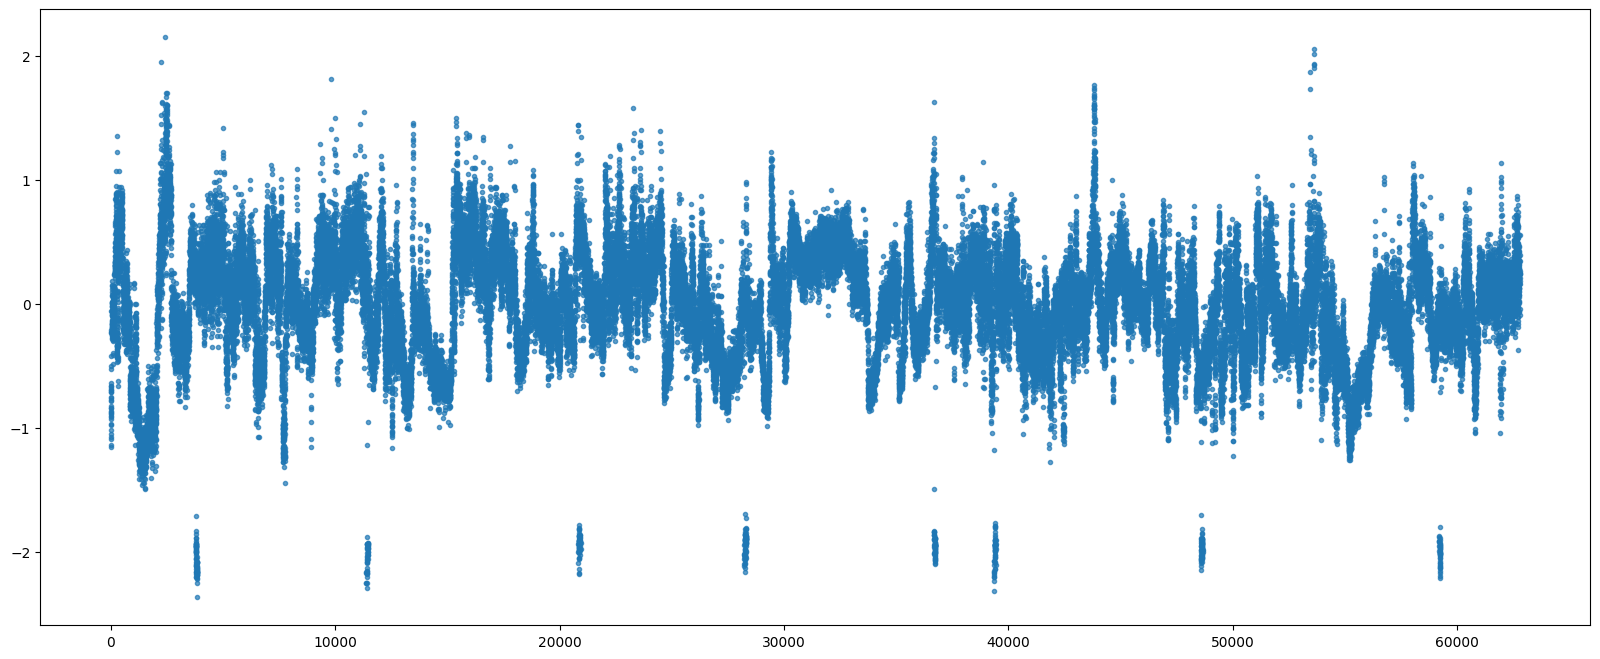

In [377]:
plt.figure(figsize=(20,8))
# plt.plot( p1.iloc[:,2], marker='.', linestyle=' ', color='grey', alpha=0.7)
plt.plot( z1.iloc[:,1], marker='.', linestyle=' ', alpha=0.7)

plt.show()

In [376]:
z1.to_csv("../data/z1.csv", index = False)

In [380]:
p1

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-02 17:21:00,7.298507,3.526023,4.814068,4.22288,-6.610844,-1.593303,-12.610141,597.957336,0.005817,...,97.139664,147.734161,103.326927,84.524704,330.882172,4.791044,184.687943,31.154491,107.668388,32.72839
1,2022-01-02 17:22:00,7.317454,3.697514,4.882964,4.094655,-7.236453,-1.962087,-12.673123,597.912109,0.006015,...,97.189583,148.282196,103.607155,85.406693,329.54599,4.86643,187.320694,31.378616,106.23645,32.959721
2,2022-01-02 17:23:00,8.19602,3.762388,4.712098,4.156788,-7.654256,-1.712566,-12.762771,596.501282,0.005587,...,94.527596,148.896072,103.804382,84.458702,328.00415,4.894835,188.627502,31.403648,105.07515,32.986744
3,2022-01-02 17:24:00,6.186108,3.800329,4.939721,4.069403,-7.086837,-1.944393,-13.081701,594.909973,0.006054,...,94.652222,149.685776,103.971046,86.044731,329.026611,4.873897,188.928131,31.104284,105.607208,32.670158
4,2022-01-02 17:25:00,7.158616,3.826208,4.882938,4.012414,-7.596999,-2.004631,-13.265251,595.766907,0.0057,...,97.977684,150.186188,104.208488,86.30896,330.415863,4.855412,189.385696,30.918022,107.866341,32.475784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67429,2022-03-16 11:51:00,18.419493,1.362339,1.209173,3.018301,-10.306822,-1.137084,-17.058517,603.60553,0.007019,...,223.972687,165.34758,118.77858,158.10733,453.707001,7.03668,249.142868,44.087776,104.398155,46.152283
67430,2022-03-16 11:52:00,19.218729,1.440606,1.153707,3.176707,-10.99775,-2.01466,-17.837925,602.928101,0.007019,...,198.30571,165.624893,118.798622,157.554337,453.322052,7.048404,248.72467,44.148773,103.65667,46.214622
67431,2022-03-16 11:53:00,19.073271,1.794209,1.574447,3.209239,-10.617782,-1.974389,-17.437344,600.781067,0.007019,...,182.354584,166.08136,118.996597,152.970673,454.827759,7.03911,248.024734,44.074032,104.710709,46.122807
67432,2022-03-16 11:54:00,19.401367,1.917023,1.682098,3.109566,-10.394741,-1.867612,-17.595339,601.025696,0.007019,...,200.991058,166.385025,119.089935,156.06868,456.635956,7.036053,247.855057,44.03347,104.677505,46.108162


In [381]:
z1

,Description,STACK NOX,SCR A Inlet O2 1 Sel,SCR A Outlet O2 1 Sel,ECON B OUT GAS O2 ANAL,SCR B Inlet Duct Press,FURN GAS PRESS,SCR A Outlet Duct Press,MAIN STM TEMP,SCR A Outlet NH3 1 Sel,...,AMM/AIR Mixer-A Inlet Flow Sel,FWT TEMP,AH A OUT GAS TEMP,SCR B I/L Duct Nox/O2 Anal Sel,TOTAL COAL FLOW WITHOUT CALORI,FWT(Feed Water Tank) PRESS,MAIN STEAM PRESS,RH(Reheater) OUT STM PRESS(To IP Turbine),AH A IN PRIM AIR PRESS,CRH A STM PRESS SELECTION
0,2022-01-02 18:23:00,-0.696720,1.780565,2.991449,2.256335,1.092835,0.794482,1.119847,-0.239467,-2.623049,...,-1.703267,-2.411596,-0.803235,-1.951646,-1.054610,-2.245224,-2.225343,-2.028138,1.154996,-2.026161
1,2022-01-02 18:26:00,-1.136638,2.060365,2.844743,2.193955,1.241182,0.187569,0.825091,-0.573274,-2.934943,...,-1.588441,-2.403986,-0.732489,-1.983516,-1.094731,-2.148095,-2.214059,-1.994608,1.173750,-1.994063
2,2022-01-02 18:28:00,-1.072279,2.094039,2.970381,1.718137,1.800609,0.376263,1.109972,-0.748070,-2.978062,...,-1.550945,-2.384171,-0.705726,-1.963824,-1.076626,-2.192102,-2.247237,-2.047210,1.242733,-2.044568
3,2022-01-02 18:29:00,-0.964906,1.876524,2.476940,1.246795,0.571312,0.333397,0.804488,-0.280129,-2.135760,...,-1.699520,-2.391775,-0.671157,-1.991270,-1.069302,-2.206725,-2.251125,-2.059985,1.402284,-2.055574
4,2022-01-02 18:30:00,-1.090287,1.899278,2.646269,1.435392,0.505971,-0.433901,0.597248,0.537152,-1.585906,...,-1.678613,-2.383275,-0.655258,-1.883006,-1.073603,-2.220357,-2.234001,-2.057402,1.130145,-2.053294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62775,2022-03-16 11:41:00,0.265857,0.000963,-0.178544,2.395042,-1.810446,0.420922,-1.151115,-1.762902,0.006577,...,1.859310,1.417205,0.204051,0.327606,1.876406,1.118065,1.125768,1.146253,0.446107,1.134180
62776,2022-03-16 11:42:00,0.161821,-0.907756,-0.520904,1.760988,-0.913002,1.519289,-1.338824,-0.996386,0.006577,...,1.929065,1.358038,0.163715,0.638279,2.061500,1.111407,1.109180,1.168355,0.571459,1.168223
62777,2022-03-16 11:43:00,0.237987,-0.725154,-0.598766,0.966108,-1.782670,1.250577,-1.370039,0.475098,0.006577,...,2.108986,1.296508,0.149471,0.913418,2.345914,1.210235,1.155295,1.304677,0.710798,1.309256
62778,2022-03-16 11:44:00,0.395763,-1.366680,-0.785705,0.135387,-1.641799,2.296248,-1.620015,1.654851,0.006577,...,2.053040,1.236892,0.152344,1.078345,2.513985,1.422461,1.216345,1.519712,0.757007,1.517956
